<a href="https://colab.research.google.com/github/jeremilev/comp472-project/blob/main/472_Assignment1_JimmyID_40133776_TimID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP 472 - Assignment 1 by Jérémi Léveillé ID: 40133776

In [1]:
# Import librairies for assignment
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:
# Download Dataset 1 'abalone.csv' from Google Drive
!gdown https://drive.google.com/uc?id=1Jc16RBC6uuCsoP9RdKYcsg0n_bsyqwP2
# Download Dataset 2 'penguins.csv' from Google Drive
!gdown  https://drive.google.com/uc?id=1yqKelS2N6Qhuk0ymj9KFSaOnIYHZE7QL


Downloading...
From: https://drive.google.com/uc?id=1Jc16RBC6uuCsoP9RdKYcsg0n_bsyqwP2
To: /content/abalone.csv
100% 203k/203k [00:00<00:00, 20.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yqKelS2N6Qhuk0ymj9KFSaOnIYHZE7QL
To: /content/penguins.csv
100% 13.1k/13.1k [00:00<00:00, 28.4MB/s]


# Question 2

## 1.

### (a)

In [3]:
# Load Dataset 1 and 2
abalone_data = pd.read_csv('/content/abalone.csv')
penguins_data = pd.read_csv('/content/penguins.csv')

#### i.

In [4]:
# peek at dataset 1
penguins_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
6,Adelie,Torgersen,39.2,19.6,195,4675,MALE
7,Adelie,Torgersen,41.1,17.6,182,3200,FEMALE
8,Adelie,Torgersen,38.6,21.2,191,3800,MALE
9,Adelie,Torgersen,34.6,21.1,198,4400,MALE


In [5]:
# METHOD 1: Convert the features 'island' and 'sex' into 1-hot vectors or 'dummy' variables.
# We name the onehot encoded penguins_data using method 1: penguins_encoded1
penguins_encoded1 = pd.get_dummies(penguins_data, columns=['island'])
penguins_encoded1 = pd.get_dummies(penguins_encoded1, columns=['sex'])

# Verify the string columns are swapped with the onehot encoded vectors
penguins_encoded1.head(10)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1
5,Adelie,38.9,17.8,181,3625,0,0,1,1,0
6,Adelie,39.2,19.6,195,4675,0,0,1,0,1
7,Adelie,41.1,17.6,182,3200,0,0,1,1,0
8,Adelie,38.6,21.2,191,3800,0,0,1,0,1
9,Adelie,34.6,21.1,198,4400,0,0,1,0,1


In [6]:
# METHOD 2: Convert the features 'island' and 'sex' manually
# Convert both columns to numpy arrays to use np.where()
np_island_col = penguins_data['island'].to_numpy()
np_sex_col = penguins_data['sex'].to_numpy()

# For island, replace 'Torgersen' = 0, 'Biscoe' = 1, 'Dream' = 2
np_island_col = np.where(np_island_col == 'Torgersen', 0, np_island_col)
np_island_col = np.where(np_island_col == 'Biscoe', 1, np_island_col)
np_island_col = np.where(np_island_col == 'Dream', 2, np_island_col)

# For sex, replace 'MALE' = 0, 'FEMALE' = 1
np_sex_col = np.where(np_sex_col == 'MALE',0,1)
# We name the encoded penguins_data using method 2: penguins_encoded2
penguins_encoded2 = penguins_data.copy(deep=True)

# Replace respective column by their encoded version
penguins_encoded2['island'] = np_island_col
penguins_encoded2['sex'] = np_sex_col

# Verify the string columns are correctly swapped with the encoded columns
penguins_encoded2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181,3750,0
1,Adelie,0,39.5,17.4,186,3800,1
2,Adelie,0,40.3,18.0,195,3250,1
3,Adelie,0,36.7,19.3,193,3450,1
4,Adelie,0,39.3,20.6,190,3650,0
...,...,...,...,...,...,...,...
328,Gentoo,1,47.2,13.7,214,4925,1
329,Gentoo,1,46.8,14.3,215,4850,1
330,Gentoo,1,50.4,15.7,222,5750,0
331,Gentoo,1,45.2,14.8,212,5200,1


### (b)

In [7]:
# peek at dataset 2
abalone_data.head(10)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11
5,I,0.495,0.375,0.120,0.5890,0.3075,0.1215,0.1405,8
6,I,0.255,0.190,0.070,0.0815,0.0280,0.0160,0.0310,5
7,M,0.670,0.525,0.180,1.4915,0.7280,0.3430,0.3810,9
8,F,0.595,0.430,0.210,1.5245,0.6530,0.3960,0.4100,11
9,F,0.535,0.420,0.130,0.6990,0.3125,0.1565,0.2035,8


In [8]:
# As shown above, if we are to use 'Type' as a categorical input feature,
# we would need to encode the column 'Type' since it is of type 'string'.
# However, since it is the prediction label, we don't need to do so.

## 2.

Penguin percentage per species:
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

Abalone percentage per sex type:
M    0.365813
I    0.321283
F    0.312904
Name: Type, dtype: float64


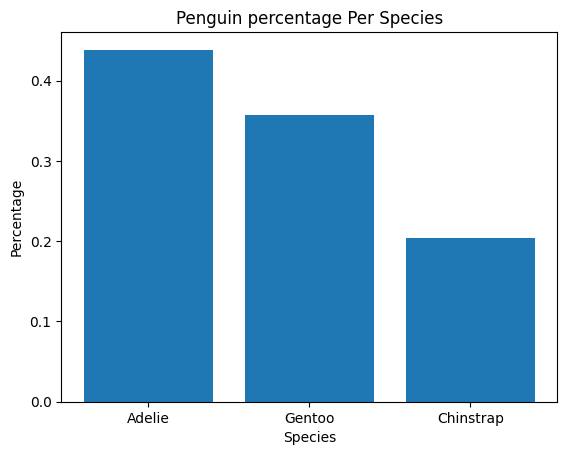

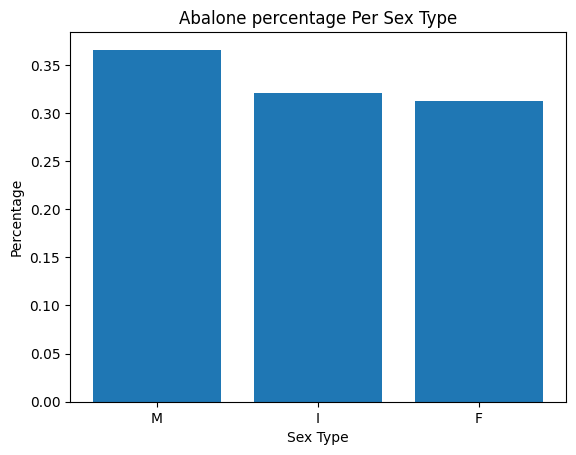

In [14]:
# Plot percentage of the instances in each output class and store the graphic in files called penguin-classes.gif and abalone-classes.gif
# How many belong to each species in the penguins dataset?
penguin_species_count = penguins_data['species'].value_counts()
penguin_species_percentage = penguin_species_count/len(penguins_data)

# How many belong to each sex type in the abalone dataset?
abalone_type_count = abalone_data['Type'].value_counts()
abalone_type_percentage = abalone_type_count/len(abalone_data)

print("Penguin percentage per species:")
print(penguin_species_percentage)
print()
print("Abalone percentage per sex type:")
print(abalone_type_percentage)

# Let's plot two bar graphs containing these values
# Penguins bar graph
plt.bar(penguin_species_percentage.index, penguin_species_percentage.values)
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.title('Penguin percentage Per Species')
plt.show()

# Abalone bar graph
plt.bar(abalone_type_percentage.index, abalone_type_percentage.values)
plt.xlabel('Sex Type')
plt.ylabel('Percentage')
plt.title('Abalone percentage Per Sex Type')
plt.show()


## 3.

In [17]:
# Split both datasets into train and test sets.
# Convert datasets to numpy arrays
np_penguin_data = penguins_encoded1.to_numpy()
np_abalone_data = abalone_data.to_numpy()

# Slice data to get labels in p_y and features in p_X
p_X = np_penguin_data[:,1:]
p_y = np_penguin_data[:,0]

# Slice data to get labels in a_y and features in a_X
a_X = np_abalone_data[:,1:]
a_y = np_abalone_data[:,0]

# Split data into train and test sets using the default parameter values.
p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

## 4.

### (a)

In [18]:
# Create Decision Tree object and train it on training sets
base_DT_penguins = tree.DecisionTreeClassifier()
base_DT_penguins = base_DT_penguins.fit(p_X_train,p_y_train)

base_DT_abalone = tree.DecisionTreeClassifier()
base_DT_abalone = base_DT_abalone.fit(a_X_train,a_y_train)

[Text(0.6666666666666666, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.646\nsamples = 249\nvalue = [104, 55, 90]'),
 Text(0.42857142857142855, 0.75, 'x[0] <= 43.3\ngini = 0.452\nsamples = 154\nvalue = [102, 51, 1]'),
 Text(0.23809523809523808, 0.5833333333333334, 'x[0] <= 42.35\ngini = 0.075\nsamples = 103\nvalue = [99, 4, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[1] <= 16.7\ngini = 0.021\nsamples = 95\nvalue = [94, 1, 0]'),
 Text(0.09523809523809523, 0.25, 'x[0] <= 39.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 86\nvalue = [86, 0, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[8] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 

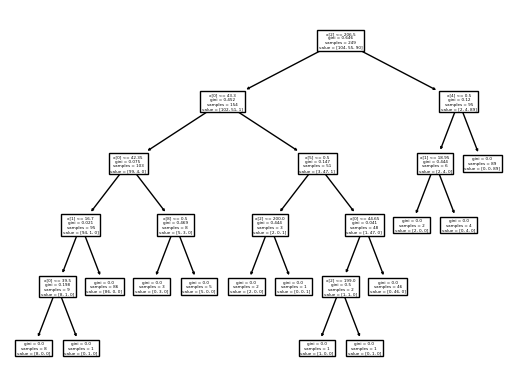

In [19]:
#Plot penguins tree
tree.plot_tree(base_DT_penguins)

[Text(0.5, 0.875, 'x[5] <= 0.144\ngini = 0.665\nsamples = 3132\nvalue = [985, 1008, 1139]'),
 Text(0.25, 0.625, 'x[7] <= 8.5\ngini = 0.529\nsamples = 1283\nvalue = [194, 813, 276]'),
 Text(0.125, 0.375, 'x[5] <= 0.093\ngini = 0.36\nsamples = 824\nvalue = [55, 645, 124]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[0] <= 0.507\ngini = 0.665\nsamples = 459\nvalue = [139, 168, 152]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[3] <= 0.945\ngini = 0.588\nsamples = 1849\nvalue = [791, 195, 863]'),
 Text(0.625, 0.375, 'x[7] <= 11.5\ngini = 0.649\nsamples = 627\nvalue = [219, 146, 262]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[4] <= 0.873\ngini = 0.537\nsamples = 1222\nvalue = [572, 49, 601]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

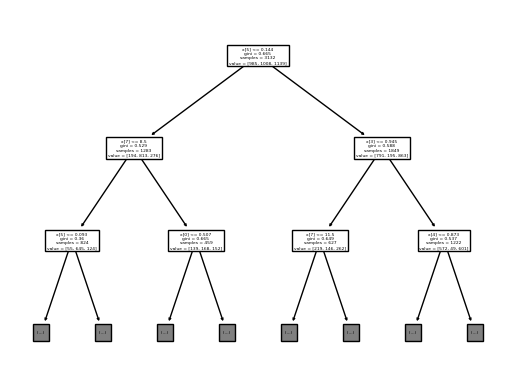

In [23]:
# Plot abalones tree
tree.plot_tree(base_DT_abalone, max_depth= 2)

### (b)

In [ ]:
# Use GridSearchCV to find the best hyperparameters for 'criterion', 'max_depth', and 'min_samples_split'

# For the penguins:
# The DT object
DT =  tree.DecisionTreeClassifier()
# The parameters in question
parameters = {'criterion': ('gini','entropy'), 'max_depth': [3,10, None], 'min_samples_split': [2,6,12]}
# The GridSearch Object
top_DT_penguins = GridSearchCV(DT, parameters)
# The training
top_DT_penguins.fit(p_X_train,p_y_train)

# For the abalone:
# The DT object
DT =  tree.DecisionTreeClassifier()
# The parameters in question
parameters = {'criterion': ('gini','entropy'), 'max_depth': [3,10, None], 'min_samples_split': [2,6,12]}
# The GridSearch Object
top_DT_abalone = GridSearchCV(DT, parameters)
# The training
top_DT_abalone.fit(a_X_train,a_y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 10, None],
                         'min_samples_split': [2, 6, 12]})

[Text(0.6666666666666666, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.646\nsamples = 249\nvalue = [104, 55, 90]'),
 Text(0.42857142857142855, 0.75, 'x[0] <= 43.3\ngini = 0.452\nsamples = 154\nvalue = [102, 51, 1]'),
 Text(0.23809523809523808, 0.5833333333333334, 'x[0] <= 42.35\ngini = 0.075\nsamples = 103\nvalue = [99, 4, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[1] <= 16.7\ngini = 0.021\nsamples = 95\nvalue = [94, 1, 0]'),
 Text(0.09523809523809523, 0.25, 'x[0] <= 39.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 86\nvalue = [86, 0, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[8] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 

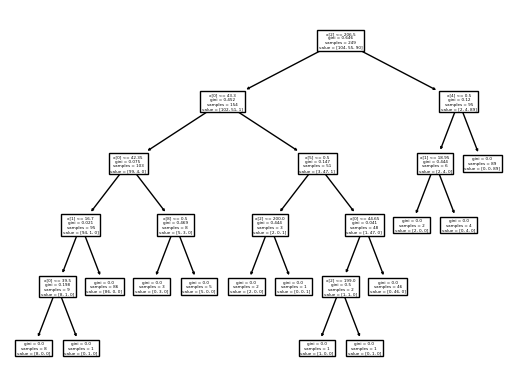

In [24]:
#Plot penguins tree
tree.plot_tree(base_DT_penguins)

[Text(0.5340277777777778, 0.9285714285714286, 'x[5] <= 0.144\ngini = 0.665\nsamples = 3132\nvalue = [985, 1008, 1139]'),
 Text(0.26944444444444443, 0.7857142857142857, 'x[7] <= 8.5\ngini = 0.529\nsamples = 1283\nvalue = [194, 813, 276]'),
 Text(0.12777777777777777, 0.6428571428571429, 'x[5] <= 0.093\ngini = 0.36\nsamples = 824\nvalue = [55, 645, 124]'),
 Text(0.07222222222222222, 0.5, 'x[7] <= 6.5\ngini = 0.276\nsamples = 594\nvalue = [23, 500, 71]'),
 Text(0.044444444444444446, 0.35714285714285715, 'x[3] <= 0.025\ngini = 0.209\nsamples = 302\nvalue = [7, 267, 28]'),
 Text(0.022222222222222223, 0.21428571428571427, 'x[4] <= 0.008\ngini = 0.43\nsamples = 16\nvalue = [0, 11, 5]'),
 Text(0.011111111111111112, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.03333333333333333, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.06666666666666667, 0.21428571428571427, 'x[0] <= 0.387\ngini = 0.192\nsamples = 286\nvalue = [7, 256, 23]'),
 Text(0.05555555555555555, 0.07142857142857142, '\n  (...)  \n

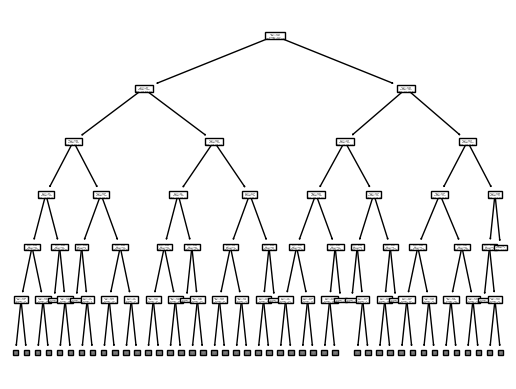

In [25]:
# Plot abalone tree
tree.plot_tree(base_DT_abalone, max_depth= 5)

### (c)

In [26]:
# Train a base MLP on the penguins and abalone datasets with:
# 2 hidden layers, 100 neurons each, sigmoid and logistic activation functions and SGD.
base_MLP_penguins = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', solver='sgd')
base_MLP_penguins = base_MLP_penguins.fit(p_X_train,p_y_train)

base_MLP_abalone = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', solver='sgd')
base_MLP_abalone = base_MLP_abalone.fit(a_X_train,a_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### (d)

In [27]:
# Use GridSearchCV to find the best hyperparameters for 'criterion', 'max_depth', and 'min_samples_split'
# For the penguins:
# The MLP object
MLP =  MLPClassifier()
# The parameters in question
parameters = {'activation': ['logistic', 'tanh','relu'], 'hidden_layer_sizes': [(30,25,10), (150,75)], 'solver': ['adam', 'sgd']}
# The GridSearch Object
top_MLP_penguins = GridSearchCV(MLP, parameters)
# The training
top_MLP_penguins.fit(p_X_train,p_y_train)

# For the abalones:
# The MLP object
MLP =  MLPClassifier()
# The parameters in question
parameters = {'activation': ['logistic', 'tanh','relu'], 'hidden_layer_sizes': [(30,25,10), (150,75)], 'solver': ['adam', 'sgd']}
# The GridSearch Object
top_MLP_abalones = GridSearchCV(MLP, parameters)
# The training
top_MLP_abalones.fit(p_X_train,p_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 25, 10), (150, 75)],
                         'solver': ['adam', 'sgd']})

## 5.

### (a)

### (b)

### (c)

### (d)

## 6.

### (a)

### (b)

### (c)